#Explain your data collection process.

I used two succulents and one spider plant in my living room window. Using Google search, I did my best to identify the species of each plant. I then set about measuring the leaves and collecting the measurements in my .csv file. In the case of both Chlorophytum Comosum and Sedum Astrid, I have multiple specimens from which I took measurements. I only have one Echeveria Pulidonis. Each plant was measured in turn. I selected the leaves mainly based on accessibility of the leaf, as the succulents are quite delicate (several leaves were lost in the process). I rounded the values from my micrometer to the nearest 0.1 mm.

#What instrument did you use to collect data with?

I used two--for the length of the spider plant's long leaves, I used a metal 30cm ruler. For the widths of all the leaves and the lengths of the succulents, I used a Neiko sub-millimeter-accuracy digital micrometer.

#Argue the accuracy and precision of your instrument.

For the ruler, my data gathering was prone to some level of error (probably 5 or so mm). I flattened the leaves along the length of the ruler and did my best to see where the tip landed.

The micrometer is much more accurate, to within 0.1 mm. In addition, the measurement process of using the caliper on the micrometer makes the measurement easier to dial in and then collect, given the digital screen with a readout that holds the measurement.

#How many data points did you collect? Why?

I collected 20 for each plant species. I know Iris has 50, and I originally intended to collect this number per species, but the tediousness of the process was very high. Also, I ran out of leaves with my two small spider plants, and so I just collected 20 each for the other two plants afterward.

#Define the size of your data in terms of both N (full data set size) and n (each subset size).

N = 60
n = 20

#Explain any problems that you ran into during the data collection process.

At first, I tried to remember which leaves I measured, but I kept losing track. Eventually, I resorted to marking a dot on the measured leaves with a sharpie. The process was surprisingly tedious and time consuming. I had to make a decision about where to measure the leaves--essentially deciding, for each leaf, what the "base" of the leaf is. Getting the instrument into the tight spaces around the delicate leaves was the most tedious part of all. Some leaves were very flexible, while others were not yet had significant bends and curves in their structure. My micrometer and ruler could not bend to these contours, so my measurements can't be exact if our definition of "length" is "a line that follows the contoured surface" vs. just a straight line from base to tip of leaf. Interestingly, it wasn't until I was testing out histograms below on each species that I noticed a data point that was way outside the bell curve for length, and a nonsense value given the plant species. Seeing it on the histogram made me realize I had keyed in an extra "2" in the length, adding an order of magnitude accidentally.

#Analysis/Visualization - (50 points)
Now that you have collected the data you will now need to analyze and visualize the data. Complete the following:


Plotting histograms for species: Chlorophytum Comosum


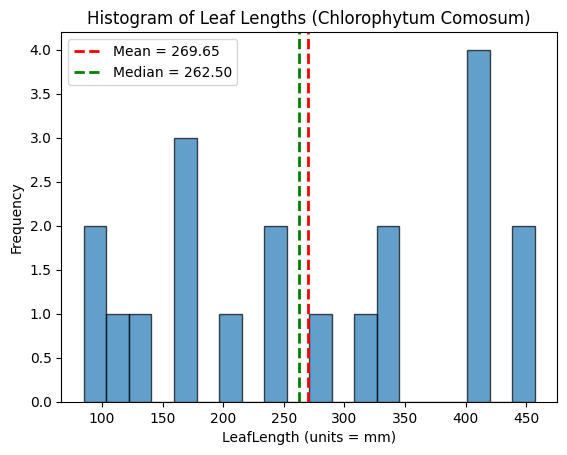

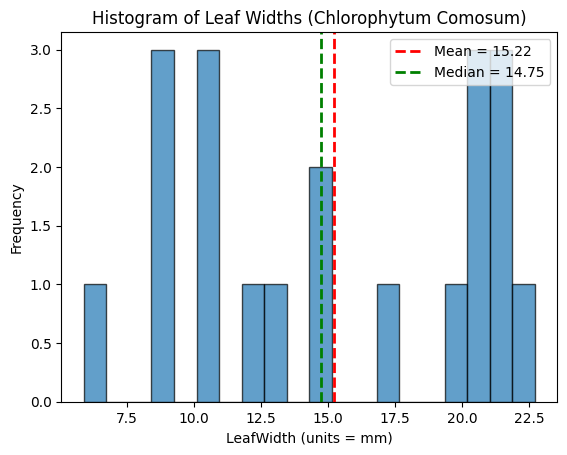


Plotting histograms for species: Echeveria Pulidonis


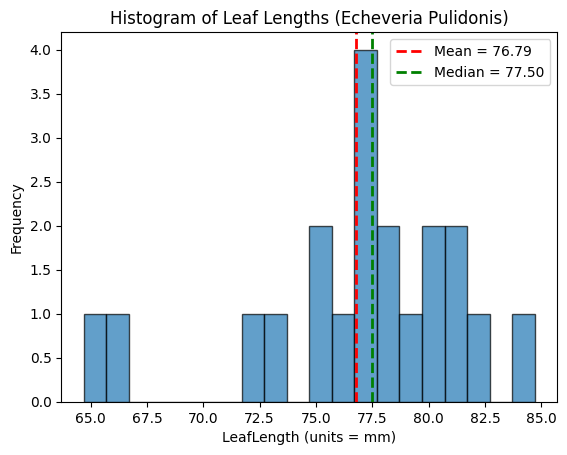

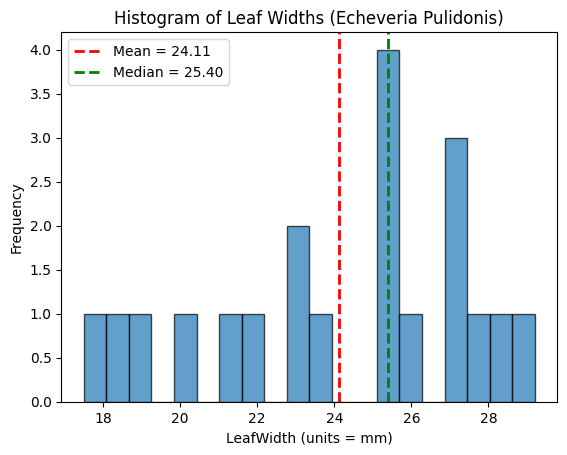


Plotting histograms for species: Sedum Astrid


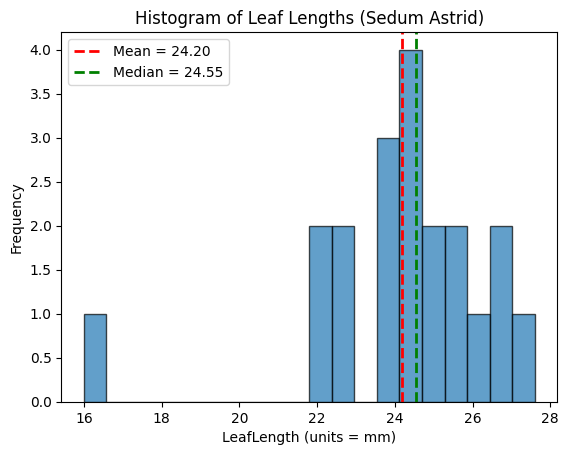

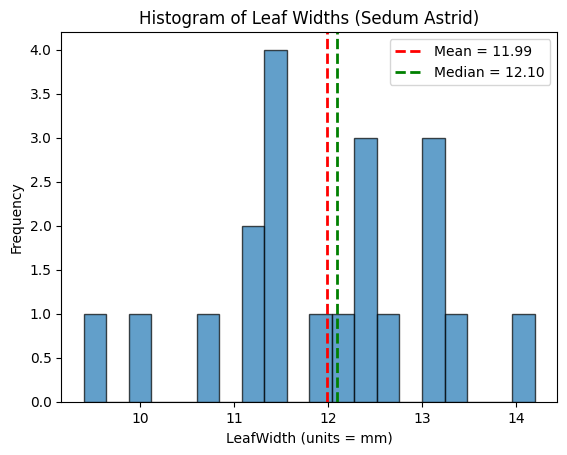

In [43]:
# 1. Graph histograms of your data with appropriate labels.

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

data = pd.read_csv("/content/Cody_Snow_Dataset.csv", sep = ",")

# code written collaboratively by me and two LLMs (chatGPT and Gemini)
def plot_length_width_histograms(df):
    """
    Plots two histograms (LeafLength and LeafWidth) with mean and median lines.

    Parameters:
        df (pandas.DataFrame): Must contain 'LeafLength' and 'LeafWidth' columns.
    """

    # Extract columns
    leaf_lengths = df["LeafLength"]
    leaf_widths  = df["LeafWidth"]

    # Calculate mean, median
    mean_val_len   = np.mean(leaf_lengths)
    median_val_len = np.median(leaf_lengths)
    mean_val_wid   = np.mean(leaf_widths)
    median_val_wid = np.median(leaf_widths)

    # -------------------
    # 1) HISTOGRAM: LENGTH
    # -------------------
    plt.hist(leaf_lengths, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel("LeafLength (units = mm)")
    plt.ylabel("Frequency")
    # title has species name
    plt.title("Histogram of Leaf Lengths" + f" ({df['Species'].iloc[0]})")

    # Overlay mean & median
    plt.axvline(mean_val_len, color='red', linestyle='dashed', linewidth=2,
                label=f"Mean = {mean_val_len:.2f}")
    plt.axvline(median_val_len, color='green', linestyle='dashed', linewidth=2,
                label=f"Median = {median_val_len:.2f}")

    plt.legend()
    plt.show()

    # -------------------
    # 2) HISTOGRAM: WIDTH
    # -------------------
    # Create a separate figure
    plt.figure()
    plt.hist(leaf_widths, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel("LeafWidth (units = mm)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Leaf Widths" + f" ({df['Species'].iloc[0]})")

    # Overlay mean & median
    plt.axvline(mean_val_wid, color='red', linestyle='dashed', linewidth=2,
                label=f"Mean = {mean_val_wid:.2f}")
    plt.axvline(median_val_wid, color='green', linestyle='dashed', linewidth=2,
                label=f"Median = {median_val_wid:.2f}")

    plt.legend()
    plt.show()


grouped_data = data.groupby("Species")

# iterate through the species and create histograms for each species' leaf length/width
for species_name, group_df in grouped_data:
    print(f"\nPlotting histograms for species: {species_name}")
    plot_length_width_histograms(group_df)

<ipython-input-44-b1ee32fd4bf7>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(length_data, labels=species_names)


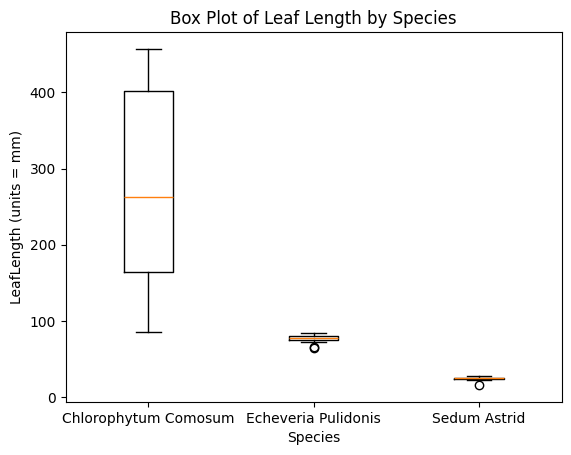

<ipython-input-44-b1ee32fd4bf7>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-44-b1ee32fd4bf7>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(width_data, labels=species_names)


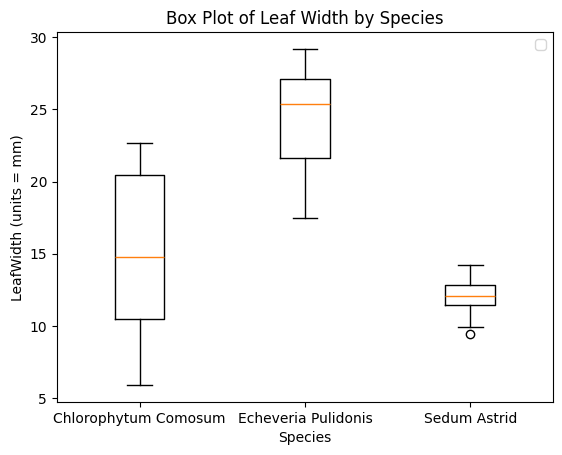

In [44]:
# 2. Graph boxplots of your data with appropriate labels.

groups = data.groupby("Species")
species_names = []
length_data   = []
width_data    = []

for species_name, group_df in groups:
    species_names.append(species_name)
    length_data.append(group_df["LeafLength"].values)
    width_data.append(group_df["LeafWidth"].values)

# Create boxplots for species side by side
plt.boxplot(length_data, labels=species_names)
plt.xlabel("Species")
plt.ylabel("LeafLength (units = mm)")
plt.title("Box Plot of Leaf Length by Species")
plt.show()
plt.legend()

plt.boxplot(width_data, labels=species_names)
plt.xlabel("Species")
plt.ylabel("LeafWidth (units = mm)")
plt.title("Box Plot of Leaf Width by Species")
plt.show()

PearsonRResult(statistic=0.21838951768022405, pvalue=0.09366877312700075)


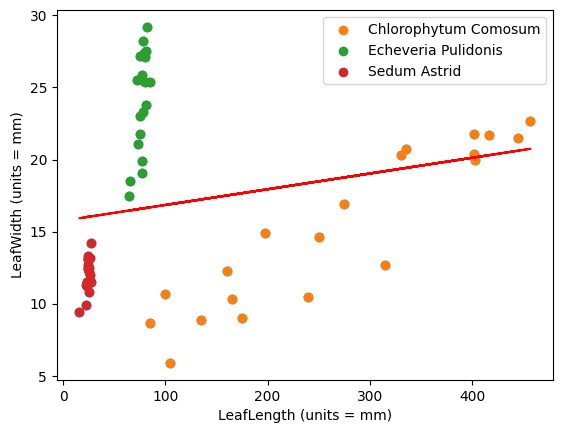

In [45]:
# 3. Graph a scatter plot of your entire data set with each subset different color and a ledger.
# code provided in class is modified below
x = data["LeafLength"]
y = data["LeafWidth"]
plt.scatter(x,y)
pearson = stats.pearsonr(x,y)
print(pearson)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x, intercept + slope * x, 'r')

# code for color-species mappings fixed
groups = data.groupby("Species")
for name, group in groups:
  x = group.LeafLength
  y = group.LeafWidth
  plt.scatter(x, y, label=name)

plt.xlabel("LeafLength (units = mm)")
plt.ylabel("LeafWidth (units = mm)")
plt.legend()
plt.show()

Species: Chlorophytum Comosum
  Std Dev (LeafLength): 125.02
  Std Dev (LeafWidth):  5.52

Species: Echeveria Pulidonis
  Std Dev (LeafLength): 4.96
  Std Dev (LeafWidth):  3.47

Species: Sedum Astrid
  Std Dev (LeafLength): 2.44
  Std Dev (LeafWidth):  1.18


Shapiro-Wilk Test for Normality on Chlorophytum Comosum
Test Statistic = 0.9260, p-value = 0.1293

Fail to reject H0 -> Data likely normal.

Plotting QQ for species: Chlorophytum Comosum


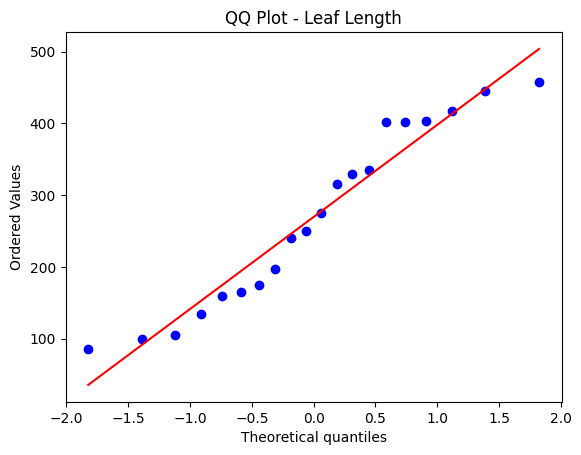


Shapiro-Wilk Test for Normality on Echeveria Pulidonis
Test Statistic = 0.9085, p-value = 0.0596

Fail to reject H0 -> Data likely normal.

Plotting QQ for species: Echeveria Pulidonis


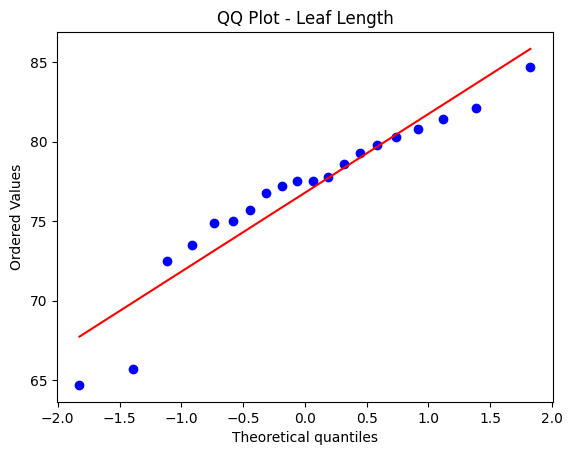


Shapiro-Wilk Test for Normality on Sedum Astrid
Test Statistic = 0.8363, p-value = 0.0032

Reject H0 -> Data not normal.

Plotting QQ for species: Sedum Astrid


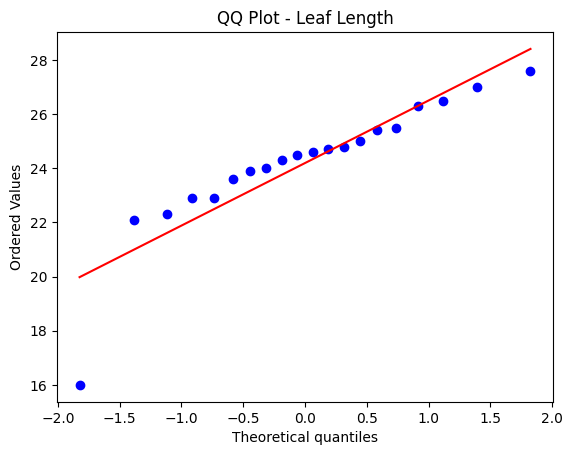

In [55]:
# 4. Explain each graph in terms of variance, mean, median, and standard deviation.

grouped_data = data.groupby("Species")

# For each species, LeafLength & LeafWidth standard deviations
for species_name, group in grouped_data:
    std_length = group["LeafLength"].std()
    std_width  = group["LeafWidth"].std()

    print(f"Species: {species_name}")
    print(f"  Std Dev (LeafLength): {std_length:.2f}")
    print(f"  Std Dev (LeafWidth):  {std_width:.2f}\n")

# Shapiro-Wilk Test for Normality and QQ Plot loop
def qq_plot(data, title):
  leaf_lengths = data["LeafLength"].to_numpy()
  stat, p_value = stats.shapiro(leaf_lengths)

  print(f"\nShapiro-Wilk Test for Normality on {species_name}")
  print(f"Test Statistic = {stat:.4f}, p-value = {p_value:.4f}\n")

  # Decision
  alpha = 0.05
  if p_value > alpha:
      print("Fail to reject H0 -> Data likely normal.")
  else:
      print("Reject H0 -> Data not normal.")

  print(f"\nPlotting QQ for species: {species_name}")
  stats.probplot(leaf_lengths, dist="norm", plot=plt)
  plt.title("QQ Plot - Leaf Length")
  plt.show()

for species_name, group_df in grouped_data:
    qq_plot(group_df, {species_name})

We can see from the histograms that the mean and median (both length and width for each species) are not equal, yet they are close. Their proximity suggests a symmetrical distribution, but their not being equal means we do not have a perfectly normal distribution. However, the two succulent species (the sedum and Echeveria Pulidonis) have histograms that look close to a typical normal, or bell-shaped, curve. Interestingly, the Chlorophytum Comosum's distribution has two peaks, similar to an example we saw in class. In measuring the leaves of the spider plants I have, I noticed that both of them have several very large, main leaves, and a number of much smaller leaves, but few leaves that have a length in between. I suspect this is why I'm seeing this double-peak. The variation here is large, whereas for the succulents it is much smaller, as the leaves are far more uniform in size. The standard deviations for the spider plant are much larger than the succulents. The sedum's leaves are tiny by comparison, so this makes sense.

To evaluate the standard deviations and "normalness" of each species' data, I created QQ plots and performed the Shapiro-Wilk test. My spider plant's data evaluates to normal, as does the Echeveria, but not the sedum. There is an outlier in the dataset that is causing issues. This illustrates a problem with my data collection--there are plenty of tiny leaves on some of my sedums, but I did not measure many of them, instead focusing on the mature leaves.

# 5. What can you infer with data and graphs that you have?

The succulents have leaves that are very close to one another in size. They are consistent across different plants within a species. This is also true for the spider plant, in that the two plants are very close to each other in size and distribution of leaf lengths/widths, but their leaves have much greater variance in length, and also width.

As I mentioned above, I am seeing some flaws with my data collection methods here. I failed to collect enough samples to get a good representation of all the leaf sizes on the sedum, and I only have one Echeveria. The spider plants are a starkly different species, so comparing them may not be all that useful. Also, it is unclear where my spider plants are in their maturity, as I repotted them from seedlings only recently.

The main takeaway for me here is how difficult data collection is, and how easy it can be to infer the wrong thing from a dataset.